#Logistic Regression

#Logistic regression assumptions
The logistic regression method assumes that:

1.  The outcome is a binary or dichotomous variable like yes vs no, positive vs negative, 1 vs 0.
2.  There is a linear relationship between the logit of the outcome and each predictor variables. Recall that the logit function is logit(p) = log(p/(1-p)), where p is the probabilities of the outcome.
3.  There is no influential values (extreme values or outliers) in the continuous predictors
4.  There is no high intercorrelations (i.e. multicollinearity) among the predictors.
<p>To improve the accuracy of your model, you should make sure that these assumptions hold true for your data. In the following sections, we’ll describe how to diagnostic potential problems in the data.</p>



In [14]:
!pip install tensorflow==1.8.0

In [0]:
%matplotlib inline

import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
data = pd.read_csv("/content/datasets_228_482_diabetes.csv")
data.shape

(768, 9)

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


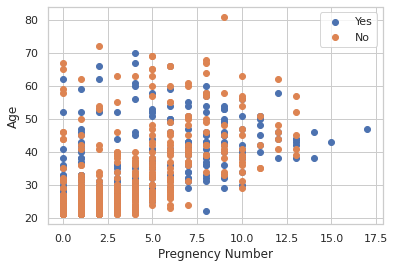

In [18]:
plt.scatter(data[data.Outcome==1].Pregnancies, data[data.Outcome==1].Age, label='Yes')
plt.scatter(data[data.Outcome==0].Pregnancies, data[data.Outcome==0].Age, label='No')
plt.xlabel('Pregnency Number')
plt.ylabel('Age')
plt.legend(loc='best')

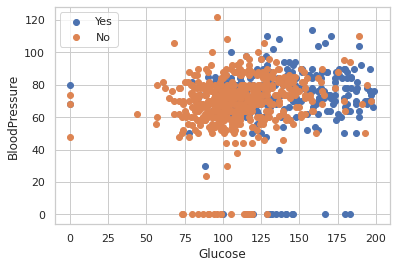

In [19]:
plt.scatter(data[data.Outcome==1].Glucose, data[data.Outcome==1].BloodPressure, label='Yes')
plt.scatter(data[data.Outcome==0].Glucose, data[data.Outcome==0].BloodPressure, label='No')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend(loc='best')

In [0]:
X = data.drop(labels=['Outcome'], axis=1).values
y = data.Outcome.values

In [0]:
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [0]:
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [0]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [0]:
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [0]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
A = tf.Variable(tf.random_normal(shape=[8, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 8])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [0]:
mod = tf.matmul(data, A) + b

In [0]:
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod,labels=target))

In [0]:
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500

In [0]:
opt=tf.train.GradientDescentOptimizer(learning_rate)

In [0]:
goal = opt.minimize(loss)

In [0]:
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [0]:
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [36]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 23.834257 train_acc: 0.646580 test_acc: 0.616883
epoch:  600 loss: 18.713455 train_acc: 0.644951 test_acc: 0.662338
epoch:  900 loss: 17.206587 train_acc: 0.657980 test_acc: 0.675325
epoch: 1200 loss: 17.099411 train_acc: 0.688925 test_acc: 0.688312
epoch: 1500 loss: 16.510881 train_acc: 0.695440 test_acc: 0.694805


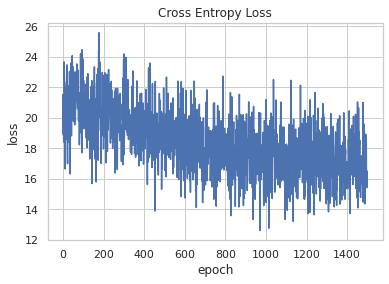

In [37]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

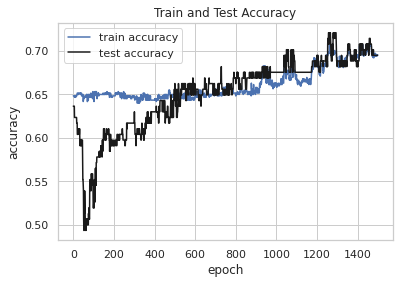

In [38]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()